<a href="https://colab.research.google.com/github/sampreeth4/Influencer-Engagement-Tracker/blob/main/Influencer_Instagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Instagram.csv")
df.head()

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.,Engagement_Rate
0,cristiano,1,Sports with a ball,462900000.0,India,5500000.0,6600000.0,0.0119
1,leomessi,2,Sports with a ballFamily,347200000.0,Argentina,3600000.0,4800000.0,0.0104
2,kendalljenner,3,ModelingFashion,247600000.0,United States,3000000.0,4900000.0,0.0121
3,arianagrande,4,Music,321400000.0,United States,2400000.0,3400000.0,0.0075
4,zendaya,5,Cinema & Actors/actressesFashion,147000000.0,United States,4300000.0,5800000.0,0.0293


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  1000 non-null   object 
 1   Rank                  1000 non-null   int64  
 2   Category              916 non-null    object 
 3   Followers             1000 non-null   float64
 4   Audience Country      986 non-null    object 
 5   Authentic Engagement  130 non-null    float64
 6   Engagement Avg.       199 non-null    float64
 7   Engagement_Rate       130 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


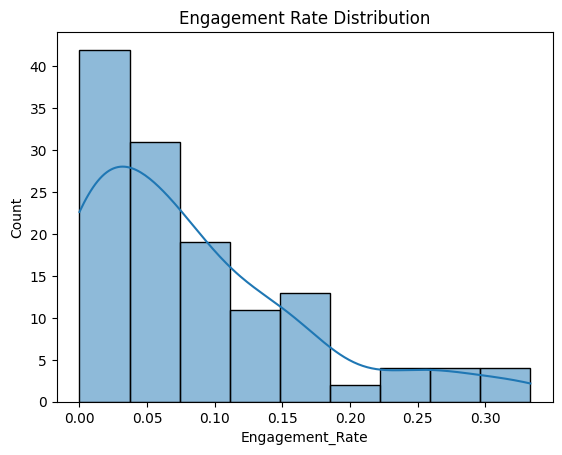

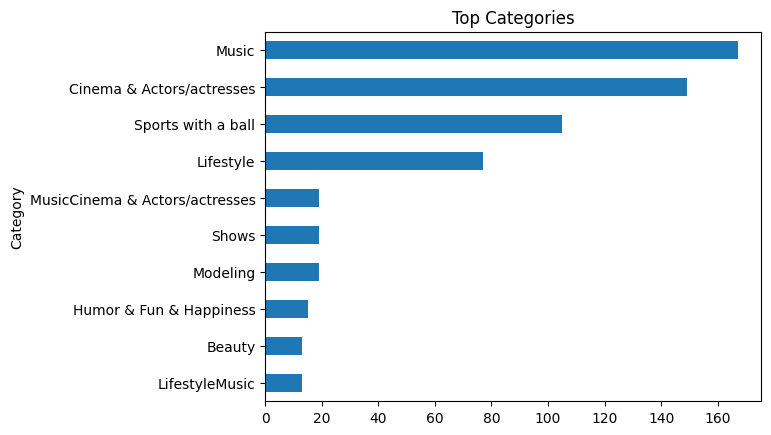

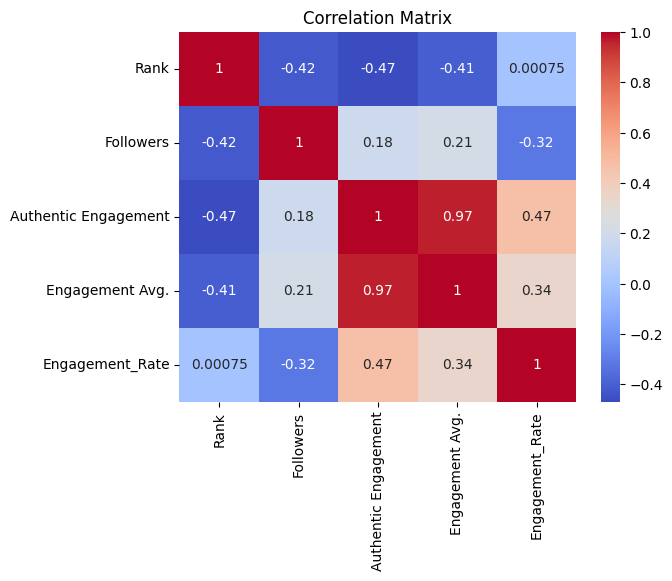

In [10]:
# Basic info
df.info()
df.describe()

# Check missing values
df.isnull().sum()

# Distribution of Engagement Rate
sns.histplot(df['Engagement_Rate'].dropna(), kde=True)
plt.title('Engagement Rate Distribution')
plt.show()

# Top Categories
df['Category'].value_counts().nlargest(10).plot(kind='barh')
plt.title('Top Categories')
plt.gca().invert_yaxis()
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [11]:
# Drop rows with missing target (Engagement_Rate)
df = df.dropna(subset=['Engagement_Rate'])

# Fill other missing numeric columns with median
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Encode categorical features
df['Category'] = df['Category'].fillna('Unknown')
df['Audience Country'] = df['Audience Country'].fillna('Unknown')

df_encoded = pd.get_dummies(df, columns=['Category', 'Audience Country'], drop_first=True)

# Drop non-useful columns
df_encoded = df_encoded.drop(['Name'], axis=1)


<ipython-input-11-d86971effd5f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())
<ipython-input-11-d86971effd5f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = df['Category'].fillna('Unknown')
<ipython-input-11-d86971effd5f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [12]:
# Binning engagement rate
def classify_engagement(rate):
    if rate < 0.01:
        return 'Low'
    elif rate < 0.025:
        return 'Medium'
    else:
        return 'High'

df['Engagement_Level'] = df['Engagement_Rate'].apply(classify_engagement)

# Drop original target
df = df.dropna(subset=['Engagement_Level'])

# Encode features again
df['Category'] = df['Category'].fillna('Unknown')
df['Audience Country'] = df['Audience Country'].fillna('Unknown')
df_encoded = pd.get_dummies(df.drop(['Name', 'Engagement_Rate'], axis=1), columns=['Category', 'Audience Country'], drop_first=True)

# Features & new target
X = df_encoded.drop('Engagement_Level', axis=1)
y = df_encoded['Engagement_Level']


<ipython-input-12-89b3574eb210>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engagement_Level'] = df['Engagement_Rate'].apply(classify_engagement)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

# 2. Logistic Regression
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)


In [14]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Random Forest Accuracy: 0.8846153846153846
Logistic Regression Accuracy: 1.0

Random Forest Report:
               precision    recall  f1-score   support

        High       0.95      0.95      0.95        20
         Low       1.00      0.80      0.89         5
      Medium       0.00      0.00      0.00         1

    accuracy                           0.88        26
   macro avg       0.65      0.58      0.61        26
weighted avg       0.92      0.88      0.90        26


Logistic Regression Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        20
         Low       1.00      1.00      1.00         5
      Medium       1.00      1.00      1.00         1

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



In [15]:
# def evaluate_model(y_true, y_pred, model_name):
#     print(f"{model_name} Results:")
#     print("R² Score:", r2_score(y_true, y_pred))
#     print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
#     print("")

# evaluate_model(y_test, y_pred_lr, "Linear Regression")
# evaluate_model(y_test, y_pred_rf, "Random Forest")
# evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
